In [1]:
#Import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime
import requests
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])


63.31910499073524 -44.93426698379628
-48.44328140524546 79.28590847360368
52.90877712362828 90.40249626836163
-23.488329298491067 34.09895077195861
-65.4923900570855 19.456471932551068
-75.78321761397291 9.270984439871796
-52.99384817912528 -170.57624913350088
79.24166883537498 162.74842272841852
88.81626809721848 -80.46382915837887
20.138649196024176 73.24893608809967
14.080160083745639 171.41251355475447
-42.675786244608496 -18.407279911876714
43.14569713350562 -15.406193225762877
-26.739486231062365 -109.54940352291405
-57.55883370884905 166.96610557408434
19.631780705215988 7.619280951499007
-70.88837093275467 -151.70997869571121
-75.95804344406997 -121.11656112781078
-81.5483320862161 -61.07182086823188
14.297310563829186 126.72052554831481
24.459374900298016 177.0829086155071
5.157889487629291 -145.65754085067184
2.1499012461781035 120.72838391017012
19.729789404914968 -70.42780046486226
-36.90669579225472 -147.39520551742152
-63.35486821637951 176.18534663186682
-88.509504778111

66.14921832676015 138.5724064436851
-50.62951841750501 -132.4647600304091
86.37867121512016 69.93266632683151
-76.69391015672012 157.99779144071272
30.105844209089483 -6.163534543311215
46.53212937137641 171.4583144527585
-22.596783235180197 114.56086835369348
8.665229052015647 -179.73401504057216
-19.792973234105943 -147.26998645699157
13.01882997350134 165.43979687371888
45.436467597038614 -173.7360369011749
-11.23010096870101 -95.35412191854785
13.078626887904036 -2.4421959636325425
45.13769303758835 -31.783624993677364
-32.720461627862704 -109.25897375058774
-4.977048764226353 -165.91208236302867
-13.934321642332051 -153.38243396066392
-59.39704642529564 138.3145665418383
-11.568896583899644 -78.58453666577925
86.45899973498854 120.44071672103001
-80.18948213222234 104.80531015175563
-33.62671078235504 -172.61919068964465
-44.50443697843093 -158.05612906914322
-35.350689961343626 -134.00374121937455
-43.286453942369775 136.82630659644667
-46.47469456373607 160.42242646830965
-61.74

In [6]:
# create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
#print the city count to confirm sufficent count.
len(cities)

605

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaqortoq
Processing Record 2 of Set 1 | mahebourg
Processing Record 3 of Set 1 | askiz
Processing Record 4 of Set 1 | manjacaze
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | cherskiy
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | jawhar
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | muros
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | arlit
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | cabatuan
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | manuk mangkaw
Processing Record 22 of Set 1 | sosua
Processing Record 23 of Set 1 | kaitangata
Processing Record 

Processing Record 37 of Set 4 | paso de carrasco
Processing Record 38 of Set 4 | pisco
Processing Record 39 of Set 4 | loubomo
Processing Record 40 of Set 4 | scalloway
City not found. Skipping...
Processing Record 41 of Set 4 | diffa
Processing Record 42 of Set 4 | nguiu
City not found. Skipping...
Processing Record 43 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 44 of Set 4 | loyga
Processing Record 45 of Set 4 | palasa
Processing Record 46 of Set 4 | adrar
Processing Record 47 of Set 4 | vikulovo
Processing Record 48 of Set 4 | vasto
Processing Record 49 of Set 4 | kaniama
Processing Record 50 of Set 4 | iqaluit
Processing Record 1 of Set 5 | ruatoria
City not found. Skipping...
Processing Record 2 of Set 5 | sayat
Processing Record 3 of Set 5 | longkou
Processing Record 4 of Set 5 | san isidro
Processing Record 5 of Set 5 | nouadhibou
Processing Record 6 of Set 5 | sars
Processing Record 7 of Set 5 | waitara
Processing Record 8 of Set 5 | sakakah
Processing Re

Processing Record 25 of Set 8 | svetlyy
Processing Record 26 of Set 8 | zhoucheng
Processing Record 27 of Set 8 | fuerte olimpo
Processing Record 28 of Set 8 | hunza
City not found. Skipping...
Processing Record 29 of Set 8 | caernarfon
Processing Record 30 of Set 8 | gorontalo
Processing Record 31 of Set 8 | rognan
Processing Record 32 of Set 8 | brae
Processing Record 33 of Set 8 | veraval
Processing Record 34 of Set 8 | mindelo
Processing Record 35 of Set 8 | mpika
Processing Record 36 of Set 8 | ambon
Processing Record 37 of Set 8 | natal
Processing Record 38 of Set 8 | metro
Processing Record 39 of Set 8 | porbandar
Processing Record 40 of Set 8 | uttaradit
Processing Record 41 of Set 8 | wanaka
Processing Record 42 of Set 8 | charlestown
Processing Record 43 of Set 8 | maghama
City not found. Skipping...
Processing Record 44 of Set 8 | ayagoz
Processing Record 45 of Set 8 | dubti
Processing Record 46 of Set 8 | tyler
Processing Record 47 of Set 8 | siguiri
Processing Record 48 of

Processing Record 14 of Set 12 | slantsy
Processing Record 15 of Set 12 | salto
Processing Record 16 of Set 12 | chunar
Processing Record 17 of Set 12 | hope
Processing Record 18 of Set 12 | puerto rondon
Processing Record 19 of Set 12 | makurdi
Processing Record 20 of Set 12 | la suiza
Processing Record 21 of Set 12 | katangli
Processing Record 22 of Set 12 | lodja
Processing Record 23 of Set 12 | sao gabriel da cachoeira
Processing Record 24 of Set 12 | qianguo
Processing Record 25 of Set 12 | nhulunbuy
Processing Record 26 of Set 12 | north myrtle beach
Processing Record 27 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 28 of Set 12 | beruwala
Processing Record 29 of Set 12 | srivardhan
Processing Record 30 of Set 12 | allapalli
Processing Record 31 of Set 12 | marzuq
Processing Record 32 of Set 12 | yerani
City not found. Skipping...
Processing Record 33 of Set 12 | kansanshi
Processing Record 34 of Set 12 | berberati
Processing Record 35 of Set 12 | pyaozers

In [8]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaqortoq,60.7167,-46.0333,44.19,98,100,2.57,GL,2022-07-04 06:19:15
1,Mahebourg,-20.4081,57.7000,71.89,60,75,18.41,MU,2022-07-04 06:19:15
2,Askiz,53.1319,90.5264,74.86,35,16,7.11,RU,2022-07-04 06:19:16
3,Manjacaze,-24.7117,33.8828,65.16,81,0,6.29,MZ,2022-07-04 06:19:16
4,Bredasdorp,-34.5322,20.0403,45.72,87,0,4.34,ZA,2022-07-04 06:19:17
5,Hermanus,-34.4187,19.2345,42.80,79,2,6.20,ZA,2022-07-04 06:19:17
6,Vaini,-21.2000,-175.2000,71.76,94,75,9.22,TO,2022-07-04 06:19:18
7,Cherskiy,68.7500,161.3000,62.38,49,92,3.42,RU,2022-07-04 06:19:18
8,Qaanaaq,77.4840,-69.3632,37.89,98,100,3.42,GL,2022-07-04 06:19:19
9,Jawhar,2.7809,45.5005,79.00,67,97,22.77,SO,2022-07-04 06:19:19


In [9]:
# organize column order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaqortoq,GL,2022-07-04 06:19:15,60.7167,-46.0333,44.19,98,100,2.57
1,Mahebourg,MU,2022-07-04 06:19:15,-20.4081,57.7000,71.89,60,75,18.41
2,Askiz,RU,2022-07-04 06:19:16,53.1319,90.5264,74.86,35,16,7.11
3,Manjacaze,MZ,2022-07-04 06:19:16,-24.7117,33.8828,65.16,81,0,6.29
4,Bredasdorp,ZA,2022-07-04 06:19:17,-34.5322,20.0403,45.72,87,0,4.34


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
#Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

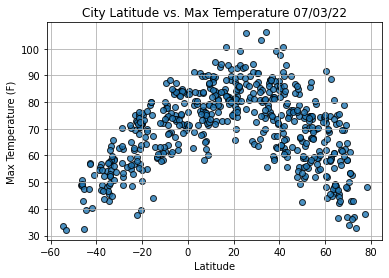

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

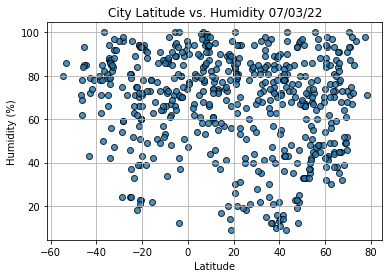

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

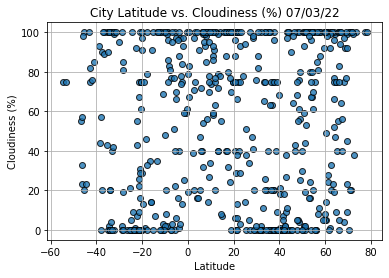

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

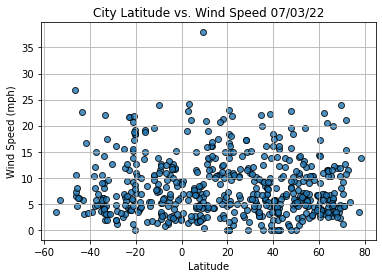

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [61]:
# Import linregresss
from scipy.stats import linregress

# Create a function to perform linear regresssion on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Perform linear regression.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel('Temp')
    plt.show()

In [62]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

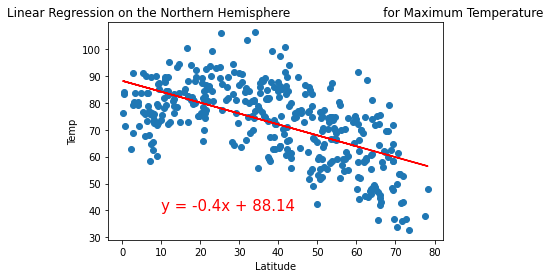

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\
                        for Maximum Temperature', 'Max Temp',(10,40))

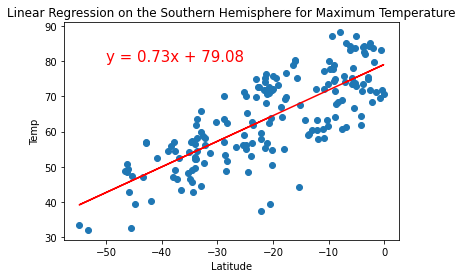

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', , 'Max Temp',(-50,80))

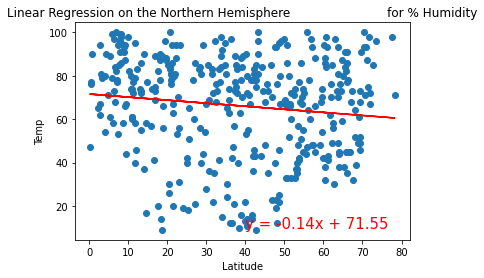

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

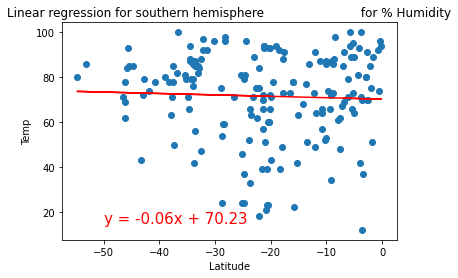

In [74]:
# Linear regression on the south hemisphere 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function. 
plot_linear_regression(x_values, y_values, 
                       "Linear regression for southern hemisphere \
                        for % Humidity", "% Humidity", (-50, 15))

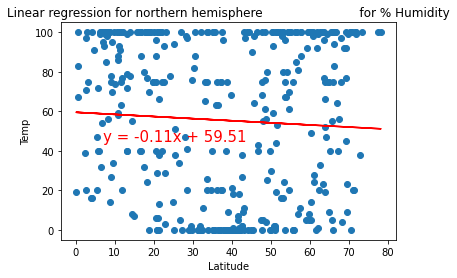

In [90]:
#Linear regression on the south hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# call the function 
plot_linear_regression(x_values, y_values, 
                       "Linear regression for northern hemisphere \
                        for % Humidity", "% Humidity", (7,45))

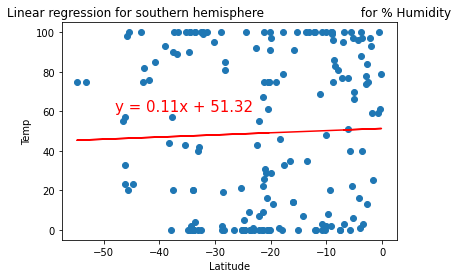

In [91]:
#Linear regression on the south hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# call the function 
plot_linear_regression(x_values, y_values, 
                       "Linear regression for southern hemisphere \
                        for % Humidity", "% Humidity", (-48,60))

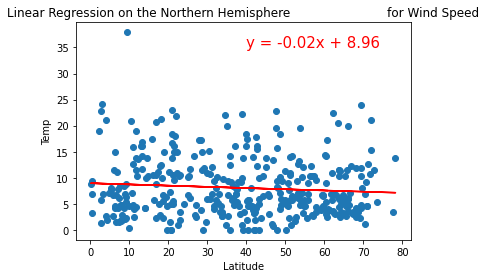

In [92]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

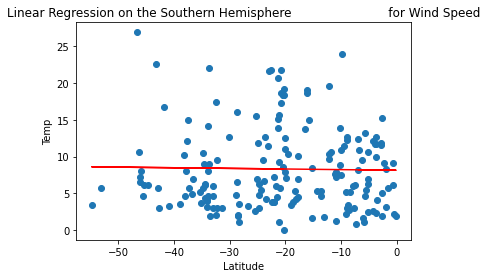

In [93]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))
